In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import pandas as pd
from functools import reduce
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from feature_lb import sentiment_scores
from preprocessing import lemmAndStem
import collections
import plotly.graph_objects as go

In [80]:
df = pd.read_csv('./Data/500_Reddit_users_posts_labels.csv')
df = lemmAndStem(df)
df

/Users/wangjiale/QWQ/preprocessing.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tokenized Post"][index]=clean_token


,User,Post,Label,Tokenized Post,New Label,Lemmatization,Stemming
0,user-0,"['Its not a viable option, and youll be leavin...",Supportive,"[viable, option, youll, leaving, wife, behind,...",0,"[viable, option, youll, leaving, wife, behind,...","[viabl, option, youll, leav, wife, behind, you..."
1,user-1,['It can be hard to appreciate the notion that...,Ideation,"[hard, appreciate, notion, could, meet, someon...",1,"[hard, appreciate, notion, could, meet, someon...","[hard, appreci, notion, could, meet, someon, e..."
2,user-2,"['Hi, so last night i was sitting on the ledge...",Behavior,"[hi, last, night, sitting, ledge, window, cont...",3,"[hi, last, night, sitting, ledge, window, cont...","[hi, last, night, sit, ledg, window, contempl,..."
3,user-3,['I tried to kill my self once and failed badl...,Attempt,"[tried, kill, self, failed, badly, cause, mome...",2,"[tried, kill, self, failed, badly, cause, mome...","[tri, kill, self, fail, badli, caus, moment, w..."
4,user-4,['Hi NEM3030. What sorts of things do you enjo...,Ideation,"[hi, nem, sorts, things, enjoy, personally, al...",1,"[hi, nem, sort, thing, enjoy, personally, alwa...","[hi, nem, sort, thing, enjoy, person, alway, w..."
...,...,...,...,...,...,...,...
495,user-495,"['Its not the end, it just feels that way. Or ...",Supportive,"[end, feels, way, least, doesnt, entire, lifet...",0,"[end, feel, way, least, doesnt, entire, lifeti...","[end, feel, way, least, doesnt, entir, lifetim..."
496,user-496,"['It was a skype call, but she ended it and Ve...",Indicator,"[skype, call, ended, ventricular, dysfunction,...",4,"[skype, call, ended, ventricular, dysfunction,...","[skype, call, end, ventricular, dysfunct, left..."
497,user-497,['That sounds really weird.Maybe you were Dist...,Supportive,"[sounds, really, weirdmaybe, distractibility, ...",0,"[sound, really, weirdmaybe, distractibility, s...","[sound, realli, weirdmayb, distract, someth, s..."
498,user-498,['Dont know there as dumb as it sounds I feel ...,Attempt,"[dont, know, dumb, sounds, feel, hyperactive, ...",2,"[dont, know, dumb, sound, feel, hyperactive, b...","[dont, know, dumb, sound, feel, hyperact, beha..."


In [82]:

def get_all_words(df, label_num):
    # a double list 
    label = df.loc[df['New Label']==label_num,:]["Lemmatization"].tolist()
    #print(label) 
    # a single list
    l =  [item for sublist in label for item in sublist]
    # string to store meaningful words in this label
    label_n = ""
    for word in l:
        # for each word, check its sentiment score
        if sentiment_scores(word) != 0:
            #print(word, "------")
            label_n = label_n+" "+word
    # return all meaningful words as string 
    return label_n

label_0 = get_all_words(df, 0)
label_1 = get_all_words(df, 1)
label_2 = get_all_words(df, 2)
label_3 = get_all_words(df, 3)
label_4 = get_all_words(df, 4)

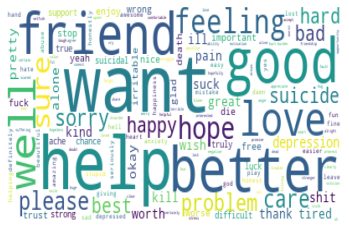

In [83]:
#Create and generate a word cloud image:
wordcloud_label_0 = WordCloud(collocations=False,background_color="white", max_words=150).generate(label_0)
wordcloud_label_1 = WordCloud(collocations=False,background_color="white", max_words=150).generate(label_1)
wordcloud_label_2 = WordCloud(collocations=False,background_color="white", max_words=150).generate(label_2)
wordcloud_label_3 = WordCloud(collocations=False,background_color="white", max_words=150).generate(label_3)
wordcloud_label_4 = WordCloud(collocations=False,background_color="white", max_words=150).generate(label_4)

plt.imshow(wordcloud_label_0, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.savefig("./image/wordcloud_label_0.png", format="png")
plt.show()

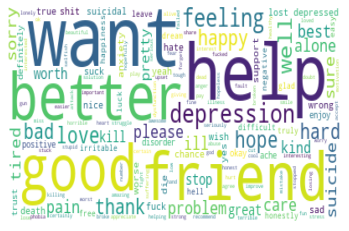

In [84]:
plt.imshow(wordcloud_label_1, interpolation='bilinear',aspect="auto")
plt.axis("off")
plt.savefig("./image/wordcloud_label_1.png", format="png")
plt.show()


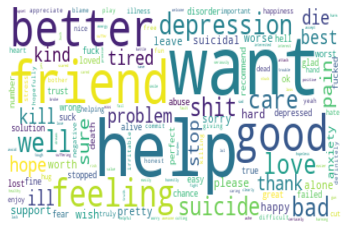

In [85]:
plt.imshow(wordcloud_label_2, interpolation='bilinear',aspect="auto")
plt.axis("off")
plt.savefig("./image/wordcloud_label_2.png", format="png")
plt.show()

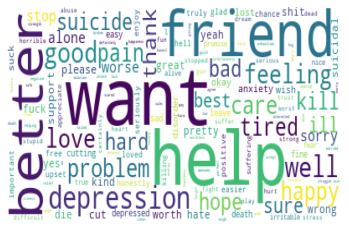

In [87]:
plt.imshow(wordcloud_label_3, interpolation='bilinear',aspect="auto")
plt.axis("off")
plt.savefig("./image/wordcloud_label_3.png", format="png")
plt.show()

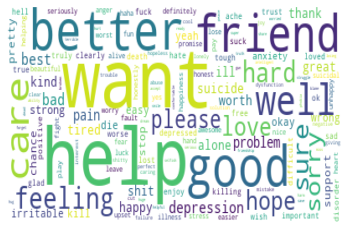

In [88]:
plt.imshow(wordcloud_label_4, interpolation='bilinear',aspect="auto")
plt.axis("off")
plt.savefig("./image/wordcloud_label_4.png", format="png")
plt.show()

Generate Freqency Graph 

In [104]:
def wordListToFreqDict(wordlist):
    somewords = []
    for p in wordlist:
        if sentiment_scores(p) != 0:
            somewords.append(p)
    wordfreq = [somewords.count(i) for i in somewords]
    return dict(zip(somewords,wordfreq))

def sortFreqDict(freqdict):
    freqDic = [(freqdict[key], key) for key in freqdict]
    freqDic.sort()
    freqDic.reverse()
    return freqDic

In [196]:
# call this function to find out top 30 meaningful words in each label, and return a datafram with columns: words, label, percentage
def freq_df(label_list, label_num):
    ll = label_list.split()
    counts_ll = collections.Counter(ll)
    counts_ll.most_common(30)
    ll_df = pd.DataFrame(counts_ll.most_common(30), columns=['words', 'count'])
    ll_df["label"] = label_num
    ll_df["percentage"] = (ll_df["count"]/len(label_list.split()))*100
    return ll_df

In [ ]:
d0 = freq_df(label_0, "0")
d1 = freq_df(label_1, "1")
d2 = freq_df(label_2, "2")
d3 = freq_df(label_3, "3")
d4 = freq_df(label_4, "4")
result = d0.append([d1, d2, d3, d4],ignore_index=True)
result_l = result["words"].tolist()
# all meaningful words for each label in one list 
all_meaningful = list(dict.fromkeys((result_l)))


**********Some Problems with Overlaied Histogram Below*************

In [198]:
# count occurence of meaningful words in given label list, return a dataframe with columns: words, label, percentage
def all_meaningful_list_freq(all_meaningful, label_n, num): 
    somewords = []
    for w in label_n.split():
        if w in all_meaningful:
            somewords.append(w)
    wordfreq = [somewords.count(i) for i in somewords]
    d = dict(zip(somewords,wordfreq))
    df = pd.DataFrame(d.items(),columns=["words", "counts"])
    df["label"] = num
    df["percentage"] = round((df["counts"]/len(label_n.split()))*100,2)
    df = df.drop(columns="counts")
    return df

final_0 = all_meaningful_list_freq(all_meaningful, label_0, 0)
final_1 = all_meaningful_list_freq(all_meaningful, label_1, 1)
final_2 = all_meaningful_list_freq(all_meaningful, label_2, 2)
final_3 = all_meaningful_list_freq(all_meaningful, label_3, 3)
final_4 = all_meaningful_list_freq(all_meaningful, label_4, 4)
data_frames = [final_0, final_1, final_2, final_3, final_4]
# concatenate all dataframes, thus get 40*5= 200 rows data
df_merged = pd.concat(data_frames, ignore_index= True)
df_merged

,words,label,percentage
0,pain,0,0.63
1,tired,0,0.56
2,shit,0,0.56
3,sorry,0,1.21
4,sure,0,1.40
...,...,...,...
195,pretty,4,0.43
196,suicide,4,0.74
197,wish,4,0.35
198,shit,4,0.82


In [202]:

import pandas as pd
from plotly import __version__ 
from plotly.offline import init_notebook_mode
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()


d0 = df_merged.loc[df_merged['label'] == 0, 'percentage']
d1 = df_merged.loc[df_merged['label'] == 1, 'percentage']
d2 = df_merged.loc[df_merged['label'] == 2, 'percentage']
d3 = df_merged.loc[df_merged['label'] == 3, 'percentage']
d4 = df_merged.loc[df_merged['label'] == 4, 'percentage']

fig = go.Figure()
fig.add_trace(go.Bar(x=df_merged['words'], y=d0, name = 'Supportive'))
fig.add_trace(go.Bar(x=df_merged['words'], y=d1, name = 'Indicator'))
fig.add_trace(go.Bar(x=df_merged['words'], y=d2, name = 'Ideation'))
fig.add_trace(go.Bar(x=df_merged['words'], y=d3, name = 'Behavior'))
fig.add_trace(go.Bar(x=df_merged['words'], y=d4, name = 'Attempt'))


fig.update_layout(title="Top Occurence Words In each Label", xaxis_title="Top Words", yaxis_title = "Occurence In Posts(percentage)")

# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()
